# Problem Statement: 

A local community college is exploring the relationship between mathematics anxiety and final exam scores in a beginning mathematics course. They have asked your firm to examine the data and eventually to determine if mathematics anxiety is reliably correlated with the final mathematics scores. 

You are a part of the data science team. As a fresher, the data has been cleaned for you and the team has assigned you to conduct the Exploratory Data Analysis (EDA). 

You need to answer the following questions in your analysis: 

1. Which Gender has the higher final scores? 
2. Which Gender has the higher anxiety? 

3. Which instructor has highest anxiety scores? 
4. Which instructor has highest anxiety score for each gender?

5. Are there any outliers for anxiety or final score? 

6. What are the mean final and anxiety scores for each instructor in general?

7. What are the mean final and anxiety scores for each instructor by gender?

8. Using skew(), are final and anxiety skewed? 

9. Using skew(), which instructors final or anxiety scores are skewed?

10. Which instructor seems better for a Female with high anxiety? 

11. Which instructor seems better for a Male with high anxiety?

# NOTE: 

1. Be sure to include clear, concise commenting with your code
2. For each cell, also include a high-level explanation in a markdown cell. 
3. Include a summary.


# Data Dictionary 

| Variable|Varible Type| Range |
|---------|------------|-------|
| Instructor | Categorical | A,B,C,D|
|Final|Numerical|0-100|
|Anxiety|Numerical|0-100|
|Gender|Categorical|Male/Female| 

# Data URL 

https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/ANXIETY.csv

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/ANXIETY.csv")

In [42]:
df.head()

,Instructor,Final,Anxiety,Gender
0,A,35,93.552,Female
1,A,70,95.164,Male
2,A,70,83.880,Female
3,A,30,84.686,Male
4,A,92,82.268,Male


1. Which Gender has the higher final scores?


Here the question is asking for the higher final score. It means that we need to calculate overall which gender has done better in the tests and have the overall mean average marks.

This can be achievd by finding the mean values of Males and Females separately and comparing them to find hwich gender has done better.



In [43]:
df_male = df[df['Gender']=='Male']

df_male_mean = df_male['Final'].mean()
df_male_mean

61.59615384615385

In [44]:
# Another way of doing the same thing is 

df[df['Gender']=='Male']['Final'].mean()

61.59615384615385

In [45]:
df_female = df[df['Gender']=='Female']

df_female_mean = df_female['Final'].mean()
df_female_mean

57.88235294117647

In [46]:
# Similaryly

df[df['Gender']=='Female']['Final'].mean()

57.88235294117647

In [47]:
if df_male_mean>df_female_mean:
    print("The Male gender has the higher final score")
else:
    print("The Female gender has the higher final score")

The Male gender has the higher final score


From the above it is clear that the Male gender has the higher final score

2. Which Gender has the higher anxiety?

Here we shall use the same logic that we have used in the above question.

In [48]:
df_male = df[df['Gender']=='Male']

df_male_mean = df_male['Anxiety'].mean()
df_male_mean

74.38373076923077

In [49]:
df_female = df[df['Gender']=='Female']

df_female_mean = df_female['Anxiety'].mean()
df_female_mean

74.30282352941177

In [14]:
# Another way of doing the same

print(df[df['Gender']=='Male']['Anxiety'].mean())
print(df[df['Gender']=='Female']['Anxiety'].mean())

74.38373076923077
74.30282352941177


In [15]:
if df_male_mean>df_female_mean:
    print("The Male gender has the higher Anxiety score")
else:
    print("The Female gender has the higher Anxiety score")

The Male gender has the higher Anxiety score


3. Which instructor has highest anxiety scores

Here again we shall use the same logic but the only difference is that we shall do the same for different instructors. Here, rather than applying the same logic 4 times we shall use simple program to achieve the same result quickly.

We shall write the program considering there are 'n' number of unque instructors so that the program can be used under any circumstances

In [106]:
inst = df['Instructor'].unique().tolist()
inst
dict_inst = {}

In [107]:
for instr in inst:
    dict_inst[instr] = df[df['Instructor']==instr]['Anxiety'].max()
 
print(dict_inst)
print(max(dict_inst))

{'A': 97.582, 'B': 91.134, 'C': 89.522, 'D': 95.97}
D


In [25]:
# A better way of doing it

ans = df.groupby(['Instructor']).max()
ans

,Final,Anxiety,Gender
Instructor,,,
A,100,97.582,Male
B,95,91.134,Male
C,95,89.522,Male
D,100,95.970,Male


From the above it is clear that the anxiety is highest for the Instructor D

4. Which instructor has highest anxiety score for each gender?

Here we shall use the same logic that we aplied in the above question. However, we shall form a dictionary of dictionaries as done below



In [54]:
inst = df['Instructor'].unique().tolist()
inst
dict_inst = {}

for instr in inst:
    dict_inst[instr] = {'Male':df[(df['Instructor']==instr) & (df['Gender']=='Male')]
                     ['Anxiety'].max(),'Female':df[(df['Instructor']==instr) & (df['Gender']=='Female')]
                        ['Anxiety'].max()}
                     
print(dict_inst)
print(max(dict_inst))


{'A': {'Male': 97.582, 'Female': 93.552}, 'B': {'Male': 91.134, 'Female': 91.134}, 'C': {'Male': 82.268, 'Female': 89.522}, 'D': {'Male': 72.596, 'Female': 95.97}}
D


In [19]:
# A better way of doing the same is 

group = df.groupby(['Instructor','Gender'])
result = group[['Anxiety']].max()
result

Anxiety
Instructor Gender         
A          Female   93.552
           Male     97.582
B          Female   91.134
           Male     91.134
C          Female   89.522
           Male     82.268
D          Female   95.970
           Male     72.596

 The highest Anxiety score for Males is for A and
  The highest Anxiety score for Females is for D 

5. Are there any outliers for anxiety or final score?

By definiton outliers are values which are outside lower outlier values and higher outlier values. In order to find the outliers we need to use the formula

lower_outliers = q1-1.5*IQR
upper_outliers = q3+1.5*IQR

where q1, q3 and IQR are 25% , 75% and Interquantile Range

It can be done as shown below



In [109]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3-q1

lower_outliers = q1-1.5*IQR
upper_outliers = q3+1.5*IQR

print(lower_outliers)
print(upper_outliers)

print(df.describe())

Final     -20.000
Anxiety    48.416
dtype: float64
Final      140.000
Anxiety    106.448
dtype: float64
            Final     Anxiety
count  101.000000  101.000000
mean    59.851485   75.008713
std     22.876794   15.651856
min     10.000000   10.000000
25%     40.000000   70.178000
50%     65.000000   79.044000
75%     80.000000   84.686000
max    100.000000   97.582000


In [110]:
anx_outlier =df[df['Anxiety']< 48.416]['Anxiety'].tolist()
anx_outlier

[10.0, 43.58, 20.206, 27.46, 37.132, 34.714]

/Users/kushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


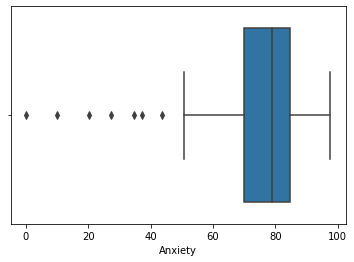

In [51]:
# After doing the session on visualization it seems box plot is a better option as the qurstions is asking
# are there any outliers. Its not specifically asking for the values so maybe we can do the following

a = sns.boxplot(df['Anxiety'])

/Users/kushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


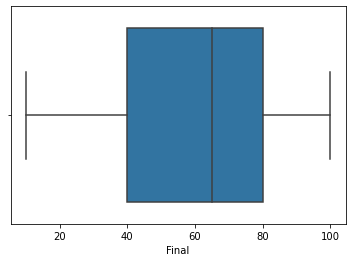

In [53]:
b = sns.boxplot(df['Final'])

6. What are the mean final and anxiety scores for each instructor in general?

Here we will be reusing the code that we used for Q3 with minor adjustments as shown.

In [55]:
inst = df['Instructor'].unique().tolist()
inst
dict_inst = {}

for instr in inst:
    dict_inst[instr] = {'Anxiety':round(df[df['Instructor']==instr]['Anxiety'].mean(),2), 
                        'Final':round(df[df['Instructor']==instr]['Final'].mean(),2)}
 
print(dict_inst)


{'A': {'Anxiety': 82.96, 'Final': 52.67}, 'B': {'Anxiety': 77.81, 'Final': 57.44}, 'C': {'Anxiety': 72.19, 'Final': 63.1}, 'D': {'Anxiety': 51.89, 'Final': 75.12}}


In [28]:
# A better way

group = df.groupby(['Instructor'])
result = group[['Anxiety','Final']].mean()
result

,Anxiety,Final
Instructor,,
A,82.960121,52.666667
B,77.811294,57.441176
C,72.193000,63.100000
D,51.891875,75.125000


7. What are the mean final and anxiety scores for each instructor by gender?

Again the same logis that is used for the above question can itself be extended.

In [57]:
inst = df['Instructor'].unique().tolist()
inst
dict_inst = {}

for instr in inst:
    dict_inst[instr] = {'Male':{'Anxiety':round(df[(df['Instructor']==instr) & (df['Gender']=='Male')]
                        ['Anxiety'].mean(),2), 'Final':round(df[(df['Instructor']==instr) & 
                        (df['Gender']=='Male')]['Final'].mean(),2)},'Female':{'Anxiety':
                        round(df[(df['Instructor']==instr) & (df['Gender']=='Female')]
                        ['Anxiety'].mean(),2), 'Final':round(df[(df['Instructor']==instr) & 
                        (df['Gender']=='Female')]['Final'].mean(),2)}}
    
dict_inst
    


{'A': {'Male': {'Anxiety': 81.26, 'Final': 56.26},
  'Female': {'Anxiety': 85.26, 'Final': 47.79}},
 'B': {'Male': {'Anxiety': 77.18, 'Final': 62.05},
  'Female': {'Anxiety': 78.61, 'Final': 51.6}},
 'C': {'Male': {'Anxiety': 68.87, 'Final': 63.75},
  'Female': {'Anxiety': 74.41, 'Final': 62.67}},
 'D': {'Male': {'Anxiety': 51.1, 'Final': 74.17},
  'Female': {'Anxiety': 52.37, 'Final': 75.7}}}

In [30]:
# A better way

group = df.groupby(['Instructor','Gender'])
result = group[['Anxiety','Final']].mean()
result

Anxiety      Final
Instructor Gender                      
A          Female  85.261714  47.785714
           Male    81.264211  56.263158
B          Female  78.614133  51.600000
           Male    77.177474  62.052632
C          Female  74.409500  62.666667
           Male    68.868250  63.750000
D          Female  52.365400  75.700000
           Male    51.102667  74.166667

8. Using skew(), are final and anxiety skewed?

Here we shall use skew() function to find the skewness of the data.

If the skewness value is bewteen -0.5 and 0.5, then, we say its normally distributed or not skewed.

less than -0.5 means that the data is negatively skewed

more than 0.5 means that the data is positively skewed

In [115]:
print(round(df['Final'].skew(),2))
print(round(df['Anxiety'].skew(),2))

-0.32
-1.76


From the above it is clear that Final is not skewed  but Anxiety is negatively skewed

9. Using skew(), which instructors final or anxiety scores are skewed?


In [ ]:
9. Using skew(), which instructors final or anxiety scores are skewed

In [58]:
inst = df['Instructor'].unique().tolist()
inst
dict_inst = {}

for instr in inst:
    dict_inst[instr] = {'Final':round(df[(df['Instructor']==instr)]
                        ['Final'].skew(),2),'Anxiety':round(df[(df['Instructor']==instr)]['Anxiety'].skew(),2)}
                     
print(dict_inst)


{'A': {'Final': -0.08, 'Anxiety': -4.05}, 'B': {'Final': -0.12, 'Anxiety': -0.27}, 'C': {'Final': -0.4, 'Anxiety': -0.22}, 'D': {'Final': -0.9, 'Anxiety': -0.39}}


In [31]:
# A better way

group = df.groupby(['Instructor'])
result = group[['Anxiety','Final']].skew()
result


# In the class wen you solved this question you used gender also along with 'Instructor' 
# but that doesn't need to be there cos question doesnt specify the gender

,Anxiety,Final
Instructor,,
A,-4.054128,-0.082272
B,-0.274613,-0.121356
C,-0.224214,-0.395085
D,-0.392188,-0.902609


From the above it is clera that

For Instructor A:          Final - Not skewed          Anxiety - Skewed

For Instructor B:          Final - Not skewed          Anxiety - Not Skewed

For Instructor A:
    Final - Not skewed
    Anxiety - Not Skewed

For Instructor A:
    Final - Skewed
    Anxiety - Not Skewed

10. Which instructor seems better for a Female with high anxiety?

In order to solve this question we need to understand that the question is asking "Which instructor has the higest avg marks for females with high anxiety.

Hence we need to calculate the Final and Anxiety scores of females instructor wise and then compare.

We can again reuse the code that we have used earlier with minor modifications.

In [59]:
for instr in inst:
    dict_inst[instr] = {'Female':{'Anxiety':round(df[(df['Instructor']==instr) & 
                    (df['Gender']=='Female')]['Anxiety'].mean(),2), 'Final':round(df[(df['Instructor']==instr)
                    & (df['Gender']=='Female')]['Final'].mean(),2)}}
    
dict_inst

{'A': {'Female': {'Anxiety': 85.26, 'Final': 47.79}},
 'B': {'Female': {'Anxiety': 78.61, 'Final': 51.6}},
 'C': {'Female': {'Anxiety': 74.41, 'Final': 62.67}},
 'D': {'Female': {'Anxiety': 52.37, 'Final': 75.7}}}

In [37]:
# A better way of doing the same is 

df1 = df[df['Gender']=='Female']
group = df1.groupby(['Instructor','Gender'])
result = group[['Anxiety','Final']].max()
result

,,Anxiety,Final
Instructor,Gender,,
A,Female,93.552,80
B,Female,91.134,90
C,Female,89.522,95
D,Female,95.970,100


From the above it is clear that for a Female with high anxiety Instructor D is the best as in his case the overall scores are higher and the general Anxiety level is lower

In [ ]:
# If you could pls suggest a way wherein we can get only Females in th groupby function I shall be grateful.
# Looked for it online and filter can be done but I couldnt implement for the same.

11. Which instructor seems better for a Male with high anxiety?

In [60]:
for instr in inst:
    dict_inst[instr] = {'Male':{'Anxiety':round(df[(df['Instructor']==instr) & (df['Gender']=='Male')]
                        ['Anxiety'].mean(),2), 'Final':round(df[(df['Instructor']==instr) & 
                        (df['Gender']=='Male')]['Final'].mean(),2)}}
    
dict_inst

{'A': {'Male': {'Anxiety': 81.26, 'Final': 56.26}},
 'B': {'Male': {'Anxiety': 77.18, 'Final': 62.05}},
 'C': {'Male': {'Anxiety': 68.87, 'Final': 63.75}},
 'D': {'Male': {'Anxiety': 51.1, 'Final': 74.17}}}

In [38]:
# A better way of doing the same is 

df1 = df[df['Gender']=='Male']
group = df1.groupby(['Instructor','Gender'])
result = group[['Anxiety','Final']].max()
result

,,Anxiety,Final
Instructor,Gender,,
A,Male,97.582,100
B,Male,91.134,95
C,Male,82.268,85
D,Male,72.596,95


From the above it is clear that for a Male with high anxiety Instructor D is the best as in his case the overall scores are higher and the general Anxiety level is lower